In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
data = pd.read_csv('data.csv', parse_dates=[0])
train, test = train_test_split(data, test_size=0.3) #разбиваем на обучающую и тестовую выборку

real_features = ['meanWidth', 'meanHeight', 'meanLength', 'meanVolume',
                 'countStacking', 'countTurnover', 'boxesCount',
                 'loadingWidth', 'loadingWidth', 'loadingLength']  # вещественные признаки
target_feature = 'density_percent'  # целевой признак

In [3]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(train[real_features], train[target_feature])  # обучаем
model.score(test[real_features], test[target_feature])

0.21409711414587418

In [4]:
print('Оценки коэффициентов перед признаками:\n', model.coef_)

print('\nОценка свободного коэффициента:\n', model.intercept_)

test_preds = model.predict(test[real_features])

print('\nMSE =', round(np.sqrt(((test[target_feature] - test_preds) ** 2).mean()), 2))

def mean_absolute_percentage_error_(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()
print('MAPE =', round(mean_absolute_percentage_error_(test[target_feature], test_preds), 2))
print(mean_absolute_percentage_error(test[target_feature], test_preds))

Оценки коэффициентов перед признаками:
 [ 3.92536290e-03  8.50500295e-03  1.59150409e-03 -1.04922185e-12
  8.57534931e-02  5.61318527e-03 -7.47561632e-02 -7.28147306e-03
 -7.28147306e-03  5.03073306e-04]

Оценка свободного коэффициента:
 88.31924974421773

MSE = 15.43
MAPE = 20.15
0.20153271317177257


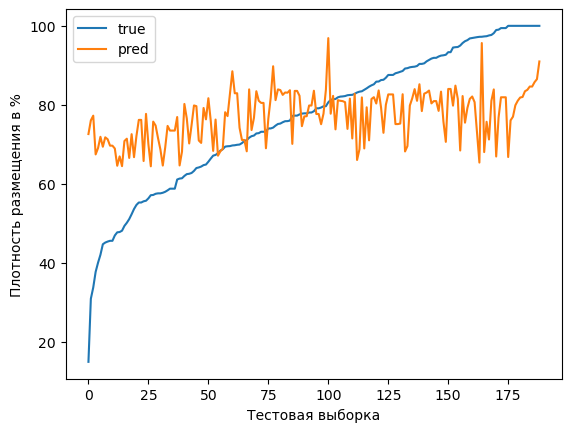

In [5]:
y_df_test, pred = zip(*sorted(zip(test[target_feature], test_preds)))
x = range(len(y_df_test))
plt.plot(x, y_df_test, label="true")
plt.plot(x, pred, label="pred")
plt.ylabel("Плотность размещения в %")
plt.xlabel("Тестовая выборка")
plt.legend()

In [6]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(fit_intercept=True, max_iter = 10000)  # объявляем модель
model_lasso.fit(train[real_features], train[target_feature])  # обучаем
model_lasso.score(test[real_features], test[target_feature])

0.21400461619221234

In [7]:
test_preds_lasso = model_lasso.predict(test[real_features])
print('MAPE =', round(mean_absolute_percentage_error(test[target_feature], test_preds_lasso), 2))

MAPE = 0.2


In [8]:
from sklearn.linear_model import BayesianRidge
Bayesian_model = BayesianRidge()
Bayesian_model.fit(train[real_features], train[target_feature])
Bayesian_model.score(test[real_features], test[target_feature])

0.20356859950778072

In [9]:
test_preds_Bayesian = Bayesian_model.predict(test[real_features])
print('\nMSE =', round(np.sqrt(((test[target_feature] - test_preds_Bayesian) ** 2).mean()), 2))
print('MAPE =', round(mean_absolute_percentage_error(test[target_feature], test_preds_Bayesian), 2))


MSE = 15.53
MAPE = 0.2


Давайте увеличим входные данные и посмотрим насколько это улучшит качество модели

width_statistics_1 - width_statistics_5 это квантили, которые разбивают данные (в этом случае о ширине коробок) на 4 равные по вероятности кусочки. Аналогично для height_statistics и length_statistics.

In [10]:
new_features = ['maxBoxCount', 'maxBoxCountPercent', 'minBoxCount', 'minBoxCountPercent',
           'width_statistics_1', 'width_statistics_2', 'width_statistics_3', 'width_statistics_4', 'width_statistics_5',
           'height_statistics_1', 'height_statistics_2', 'height_statistics_3', 'height_statistics_4', 'height_statistics_5',
           'length_statistics_1', 'length_statistics_2', 'length_statistics_3','length_statistics_4','length_statistics_5',
           'mostWithSameWidthPercent', 'mostWithSameheightPercent', 'mostWithSameLengthPercent',
           'meanWidth','meanHeight','meanLength','meanVolume',
           'rotationNotZeroCount', 'countStacking', 'countTurnover', 'boxesCount', 
           'loadingWidth', 'loadingHeight', 'loadingLength','meanMass']

In [11]:
new_model = LinearRegression(fit_intercept=True)  # объявляем модель
new_model.fit(train[new_features], train[target_feature])  # обучаем
new_model.score(test[new_features], test[target_feature])

0.5298302970984207

In [12]:
print('Оценки коэффициентов перед признаками:\n', model.coef_)

print('\nОценка свободного коэффициента:\n', model.intercept_)

new_test_preds = new_model.predict(test[new_features])

print('\nMSE =', round(np.sqrt(((test[target_feature] - new_test_preds) ** 2).mean()), 2))
print('MAPE =', round(mean_absolute_percentage_error(test[target_feature], new_test_preds), 2))


Оценки коэффициентов перед признаками:
 [ 3.92536290e-03  8.50500295e-03  1.59150409e-03 -1.04922185e-12
  8.57534931e-02  5.61318527e-03 -7.47561632e-02 -7.28147306e-03
 -7.28147306e-03  5.03073306e-04]

Оценка свободного коэффициента:
 88.31924974421773

MSE = 11.94
MAPE = 0.15


Давайте посмотрим как эти характеристики взаимосвязаны.

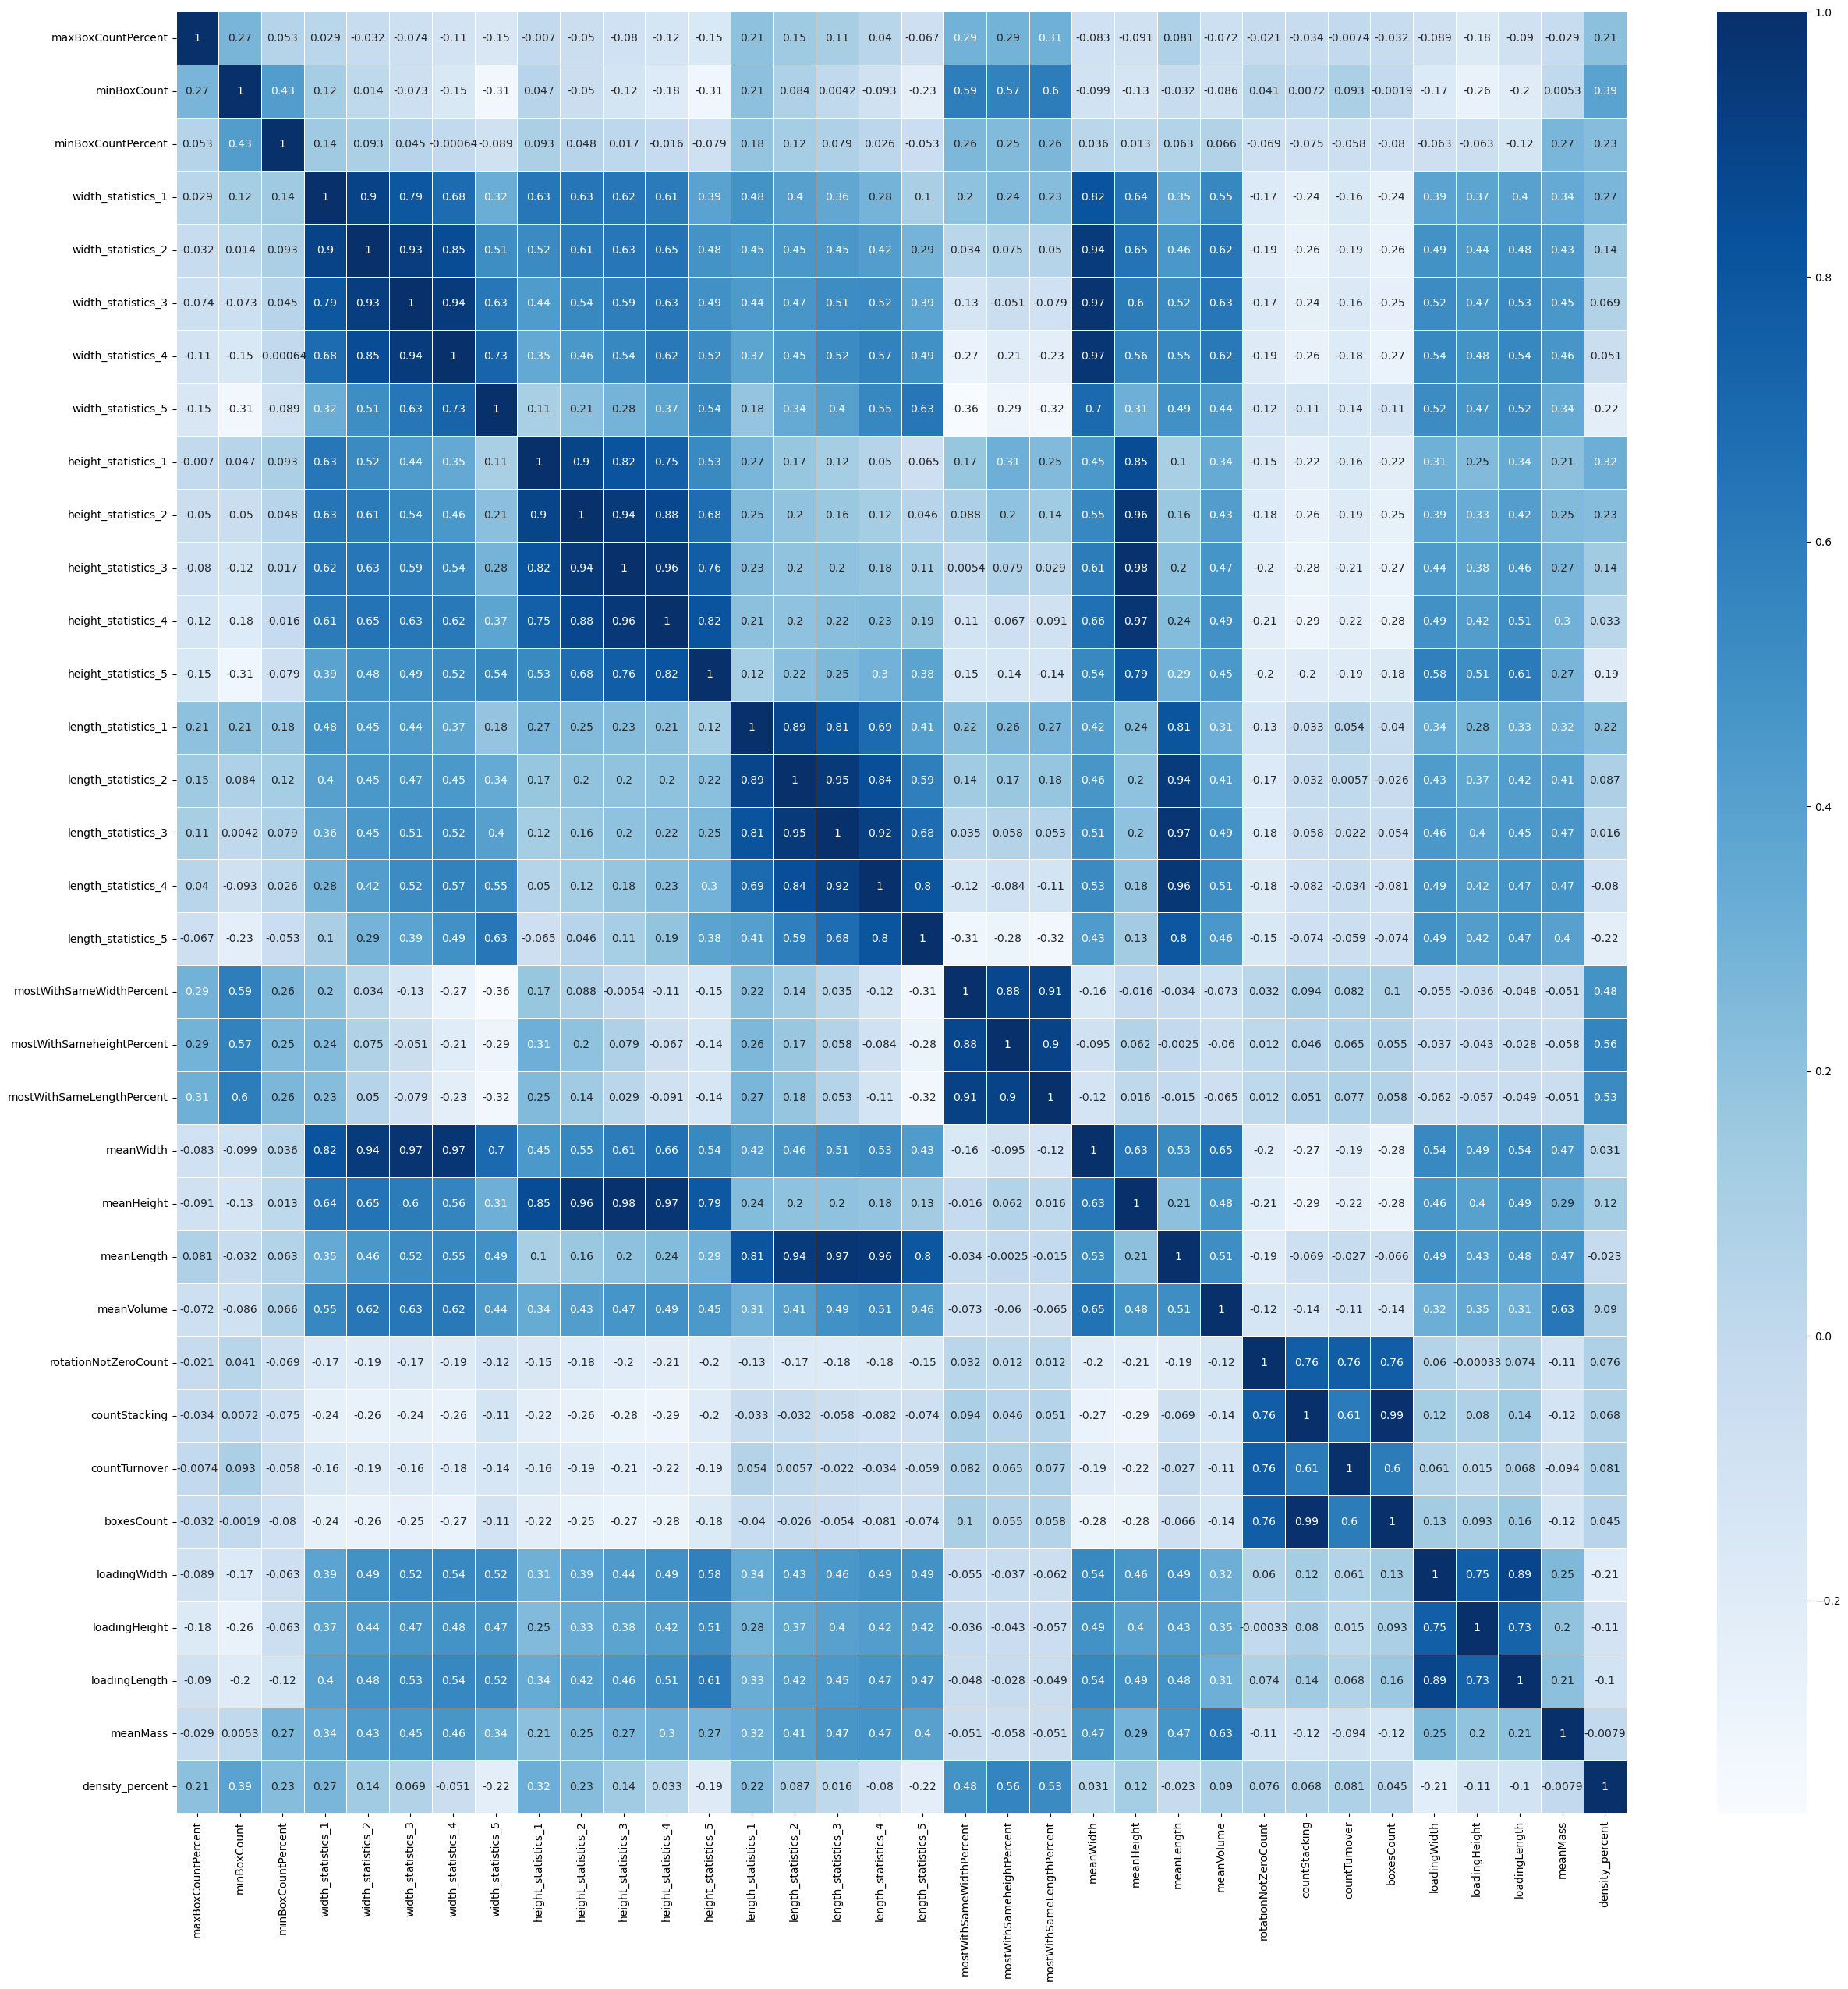

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches
sns.heatmap(data[['maxBoxCount', 'maxBoxCountPercent', 'minBoxCount', 'minBoxCountPercent',
           'width_statistics_1', 'width_statistics_2', 'width_statistics_3', 'width_statistics_4', 'width_statistics_5',
           'height_statistics_1', 'height_statistics_2', 'height_statistics_3', 'height_statistics_4', 'height_statistics_5',
           'length_statistics_1', 'length_statistics_2', 'length_statistics_3','length_statistics_4','length_statistics_5',
           'mostWithSameWidthPercent', 'mostWithSameheightPercent', 'mostWithSameLengthPercent',
           'meanWidth','meanHeight','meanLength','meanVolume',
           'rotationNotZeroCount', 'countStacking', 'countTurnover', 'boxesCount', 
           'loadingWidth', 'loadingHeight', 'loadingLength','meanMass', 'density_percent']].corr(), cmap='Blues', annot=True, linewidths=.5, ax=ax)
plt.show()

Неcложно заметить, что некоторые свойства являются коллинеарными. Также можно заметить, что данные о коробок с наименьшими и наибольшими габаритами больше всего влияют на density_percent.

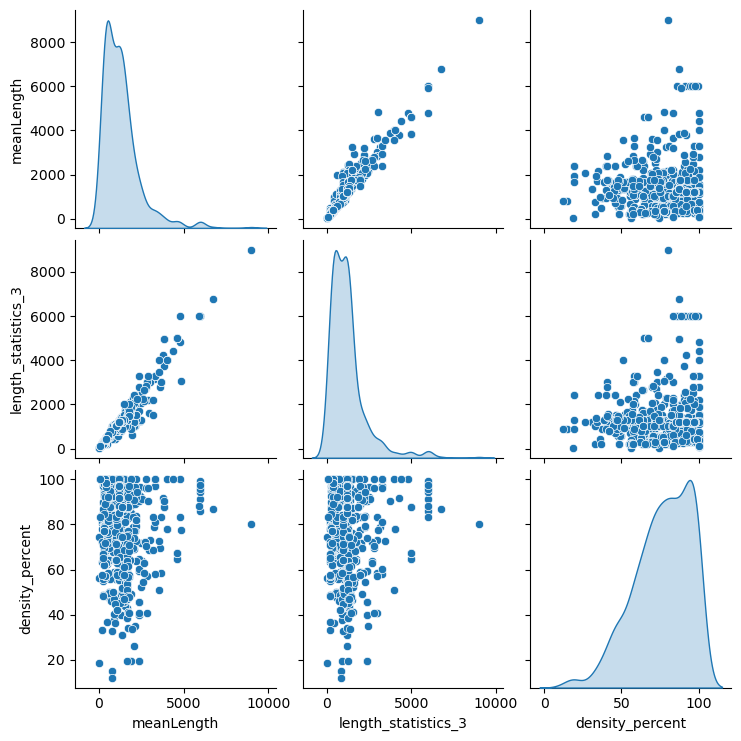

In [14]:
import seaborn as sns

sns.pairplot(data=data[["meanLength", "length_statistics_3", "density_percent"]], diag_kind='kde')

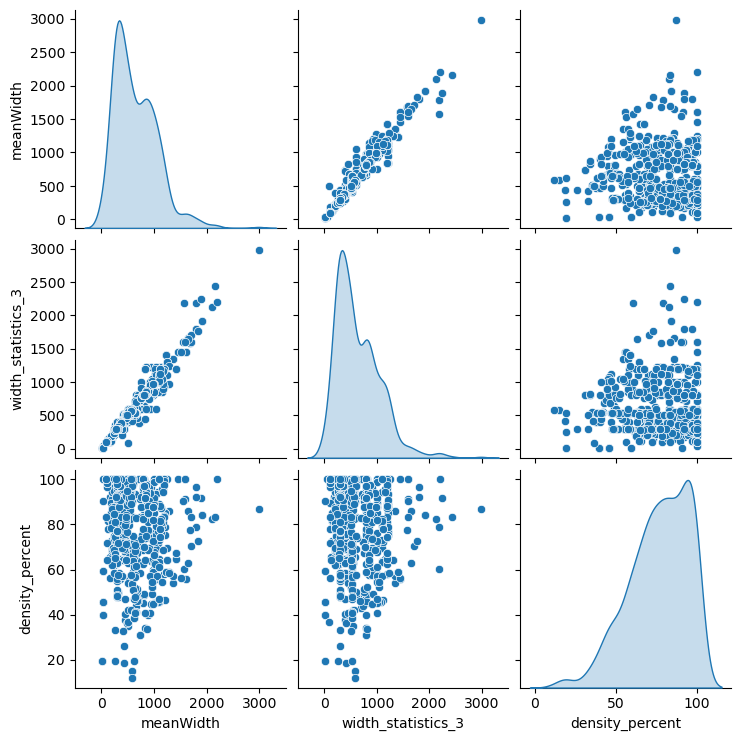

In [15]:
sns.pairplot(data=data[["meanWidth", "width_statistics_3", "density_percent"]], diag_kind='kde')

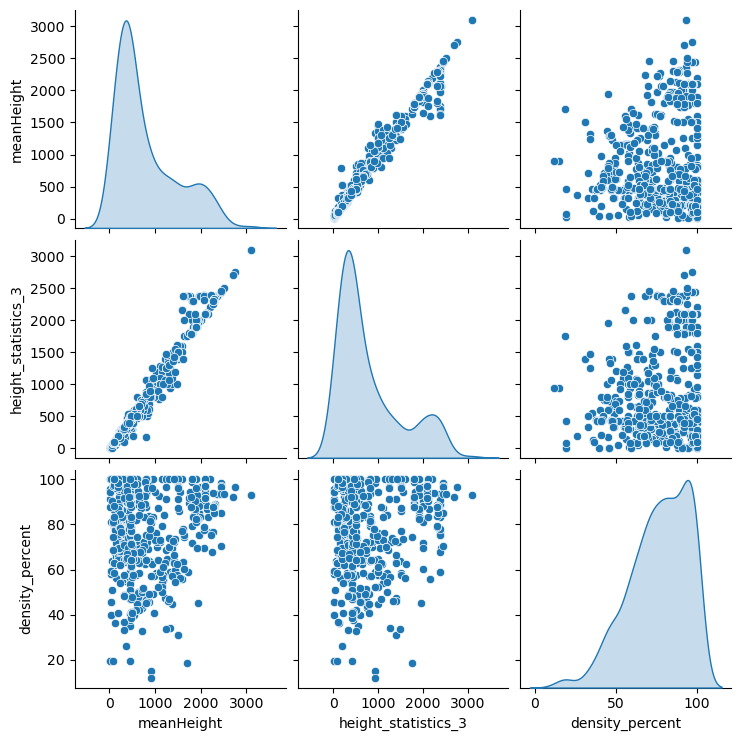

In [16]:
sns.pairplot(data=data[["meanHeight", "height_statistics_3", "density_percent"]], diag_kind='kde')

По графикам выше можно заметить, что такие свойства как meanWidth и width_statistics_3 коллинеарны. 

Такие свойства ухудшают работу модели, так что давайте уберём следующие характеристики:

 "meanMass",  'height_statistics_3', 'length_statistics_3', 'width_statistics_3',

In [17]:
new_features_2 = ['maxBoxCount', 'maxBoxCountPercent', 'minBoxCount', 'minBoxCountPercent',
           'width_statistics_1', 'width_statistics_2', 'width_statistics_3', 'width_statistics_4', 'width_statistics_5',
           'height_statistics_1', 'height_statistics_2', 'height_statistics_3', 'height_statistics_4', 'height_statistics_5',
           'length_statistics_1', 'length_statistics_2', 'length_statistics_3','length_statistics_4','length_statistics_5',
           'mostWithSameWidthPercent', 'mostWithSameheightPercent', 'mostWithSameLengthPercent',
           'meanWidth','meanHeight','meanLength','meanVolume',
           'rotationNotZeroCount', 'countStacking', 'countTurnover', 'boxesCount', 
           'loadingWidth', 'loadingHeight', 'loadingLength','meanMass']

In [18]:
new_model_2 = LinearRegression(fit_intercept=True)  # объявляем модель
new_model_2.fit(train[new_features_2], train[target_feature])  # обучаем
new_model_2.score(test[new_features_2], test[target_feature])

0.5298302970984207

In [19]:
new_test_preds_2 = new_model_2.predict(test[new_features_2])
print('\nMSE =', round(np.sqrt(((test[target_feature] - new_test_preds_2) ** 2).mean()), 2))
print('MAPE =', round(mean_absolute_percentage_error(test[target_feature], new_test_preds_2), 2))


MSE = 11.94
MAPE = 0.15


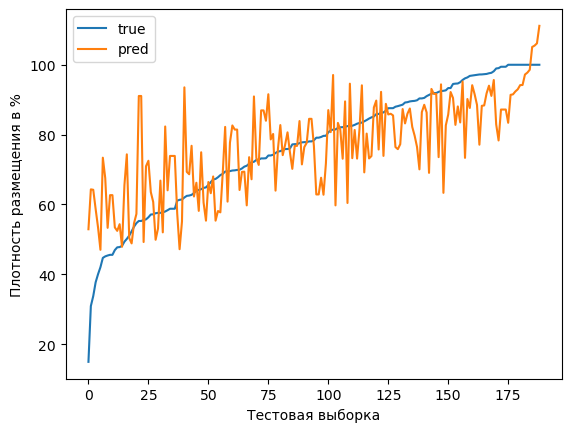

In [20]:
y_df_test, pred = zip(*sorted(zip(test[target_feature], new_test_preds_2)))
x = range(len(y_df_test))
plt.plot(x, y_df_test, label="true")
plt.plot(x, pred, label="pred")
plt.ylabel("Плотность размещения в %")
plt.xlabel("Тестовая выборка")
plt.legend()